🧭 Customer Segmentation using K-Means and PCA
- 📌 Project Overview
In this project, we apply unsupervised learning techniques to group customers into meaningful segments based on behavioral and demographic attributes such as Age, Annual Income, and Spending Score.
Instead of treating every customer the same, segmentation helps businesses understand diverse customer needs, personalize marketing strategies, and optimize product offerings.
- 🎯 Objectives
To perform Customer Segmentation using the K-Means clustering algorithm.
To determine the optimal number of clusters (K) using Elbow and Silhouette methods.
To use Principal Component Analysis (PCA) for 2-D visualization and dimensionality reduction.
To interpret each cluster and derive business insights that can guide strategic decisions.
- ⚙️ Methodology
Data Preparation – Load or simulate customer data with key variables (Age, Income, Spending Score).
Feature Scaling – Standardize numeric features for fair clustering performance.
Model Training – Apply K-Means to identify natural groups within data.
Evaluation – Use inertia and silhouette scores to validate cluster quality.
Visualization – Apply PCA to project high-dimensional data into 2-D for clear visual representation.
Interpretation – Analyze centroids to describe customer profiles and actionable insights.
- 📊 Expected Deliverables
2-D PCA scatter plot showing distinct customer clusters.
Cluster summary table with average age, income, and spending score.
Interpretations of each segment (e.g., Impulse Buyers, Frugal Professionals, Luxury Seekers).
Elbow and Silhouette graphs to justify cluster choice.
Final Markdown-based report highlighting business applications and insights.
- 💡 Real-World Relevance
Customer segmentation is a cornerstone of data-driven marketing.
By identifying unique behavioral groups, companies can:
Launch personalized campaigns,
Design targeted offers, and
Improve customer satisfaction and retention.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn . decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
data = {
    "Age": np.random.randint(18,65,200),
    "Annual_Income_(k$)":np.random.randint(15,150,200),
    "Spending_Score":np.random.randint(1,100,200)
}

df = pd.DataFrame(data)
df.head()



In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


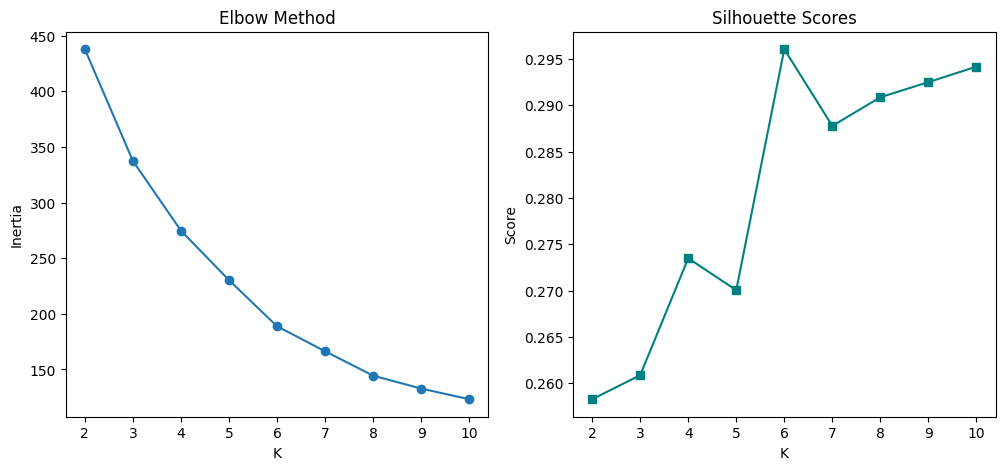

In [17]:
inertias , sil_scores = [] , []
K_range = range(2,11)

for k in K_range:
    model = KMeans(n_clusters=k , init='k-means++' , n_init=10 , random_state=42)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled,labels))

fig, ax1 = plt.subplots(1,2, figsize=(12,5))
ax1[0].plot(K_range, inertias, 'o-')
ax1[0].set_title("Elbow Method")
ax1[0].set_xlabel("K")
ax1[0].set_ylabel("Inertia")

ax1[1].plot(K_range, sil_scores, 's-', color='teal')
ax1[1].set_title("Silhouette Scores")
ax1[1].set_xlabel("K")
ax1[1].set_ylabel("Score")
plt.show()


In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels


In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                         columns=["Age","Annual_Income_(k$)","Spending_Score"])


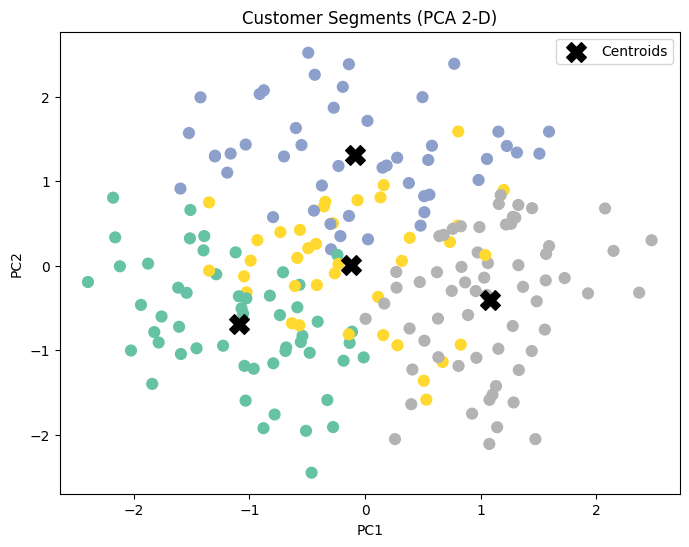

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set2', s=60)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.title("Customer Segments (PCA 2-D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [ ]:
summary = df.groupby('Cluster')[['Age','Annual_Income_(k$)','Spending_Score']].mean()
summary.round(1)


,Age,Annual_Income_(k$),Spending_Score
Cluster,,,
0,38.5,41.1,27.1
1,50.4,71.0,80.7
2,50.4,109.2,28.4
3,29.6,111.5,57.9


In [22]:
print("Inertia:", kmeans.inertia_)
print("Silhouette:", silhouette_score(X_scaled, labels))


Inertia: 274.7623974218392
Silhouette: 0.2734877758914609


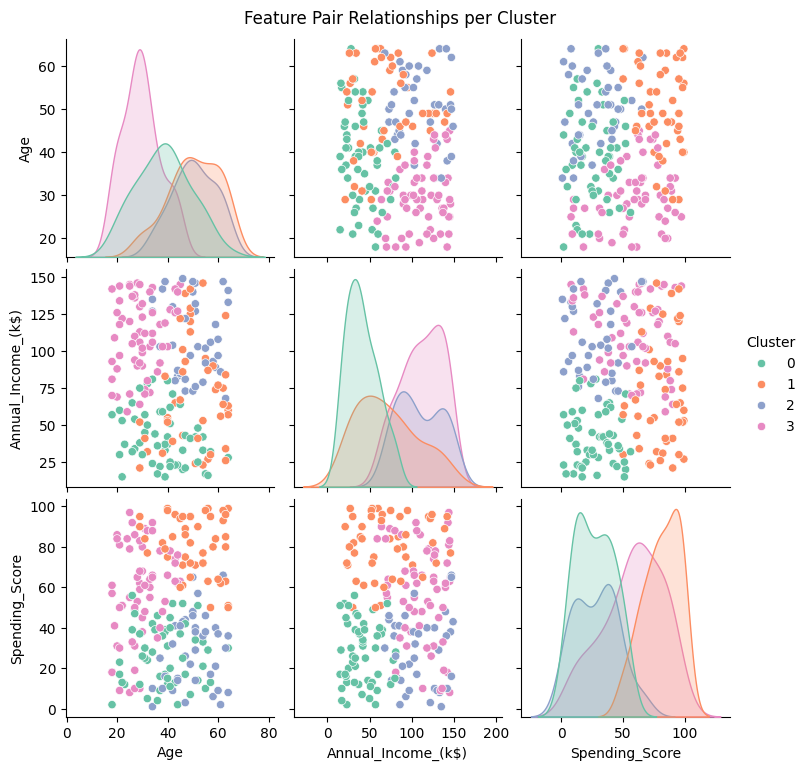

In [23]:
sns.pairplot(df, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Feature Pair Relationships per Cluster", y=1.02)
plt.show()
